In [1]:
import numpy as np
import tensorflow as tf

from trainer import Trainer
from config import get_config
from data_loader import get_loader
from utils import prepare_dirs_and_logger, save_config

In [2]:
from matplotlib import pyplot as plt

In [3]:
import os

In [4]:
nPix = 64
batch_size = 16

In [5]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [6]:
data_path = './data/celeba_narrow/'
do_shuffle=True

In [7]:
from shutil import copyfile
try:
    os.mkdir('./tmpmodel/')
except:
    print('dir exists')
    

dir exists


In [8]:
import glob
for f in glob.glob('./tmpmodel/*'):
    os.remove(f)
for f in glob.glob('./logs/fear_0110_173922/' + '*'):
    if f[-3:] != 'png':
        
        copyfile(f, './tmpmodel/' + f.split('/')[-1])

In [9]:
data_loader = get_loader(
        data_path, batch_size, nPix, "NCHW")

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


In [10]:
config, unparsed = get_config()
config.model_dir = './tmpmodel/'
config.batch_size = batch_size
## Important - load the model here
config.load_path = './tmpmodel/'
config.is_train = False
config.save_step = 0
prepare_dirs_and_logger(config)

In [11]:
trainer = Trainer(config, data_loader)

Instructions for updating:
Please switch to tf.train.MonitoredTrainingSession


2019-01-14 16:04:15,471:WARNING::From /home/leonardo/Documents/GPUcomputing/BEGAN-tensorflow/trainer.py:107: Supervisor.__init__ (from tensorflow.python.training.supervisor) is deprecated and will be removed in a future version.
Instructions for updating:
Please switch to tf.train.MonitoredTrainingSession


INFO:tensorflow:Restoring parameters from ./tmpmodel/model.ckpt-49510


2019-01-14 16:04:16,241:INFO::Restoring parameters from ./tmpmodel/model.ckpt-49510


INFO:tensorflow:Running local_init_op.


2019-01-14 16:04:16,443:INFO::Running local_init_op.


INFO:tensorflow:Done running local_init_op.


2019-01-14 16:04:16,476:INFO::Done running local_init_op.


INFO:tensorflow:Starting standard services.


2019-01-14 16:04:17,144:INFO::Starting standard services.


INFO:tensorflow:Saving checkpoint to path ./tmpmodel/model.ckpt


2019-01-14 16:04:17,164:INFO::Saving checkpoint to path ./tmpmodel/model.ckpt


INFO:tensorflow:Starting queue runners.


2019-01-14 16:04:17,164:INFO::Starting queue runners.


INFO:tensorflow:step/sec: 0


2019-01-14 16:04:17,165:INFO::step/sec: 0


In [12]:
#   NOW for the testing we will use the following.... 
# def generate(self, inputs, root_path=None, path=None, idx=None, save=True): 

#     def autoencode(se 
#     def encode(self .D_z, {self.x: inputs})

#     def decode(self, z): 
#     def interpolate_G(self,  
#     def interpolate_D(self 

In [13]:
from skimage import io, transform, color

In [14]:
myface = transform.resize(io.imread('CRASSH/BLfaces/00016.jpg'),(nPix,nPix))
myface = color.gray2rgb(myface)
# myface = transform.resize(io.imread('CRASSH/wgafaces/00004.jpg'),(nPix,nPix))



/home/leonardo/.conda/envs/tensorflow/lib/python3.5/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/leonardo/.conda/envs/tensorflow/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


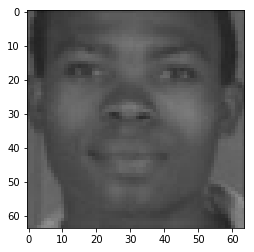

In [15]:
plt.imshow(myface)

In [16]:
myim = np.tile(myface,(16,1,1,1))
myencoding = trainer.encode(myim*255)

In [17]:
mydecoding = trainer.decode(myencoding)

In [18]:
mydecoding.shape

(16, 64, 64, 3)

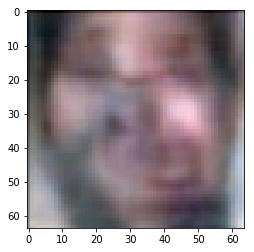

In [19]:
modelout = mydecoding[0,:,:,:]
modelout -= np.min(modelout)
modelout = modelout / np.max(modelout)
plt.imshow(modelout)

In [20]:
defaultims = trainer.get_image_from_loader()
defencode = trainer.encode(defaultims)
defdecode = trainer.decode(defencode)/255

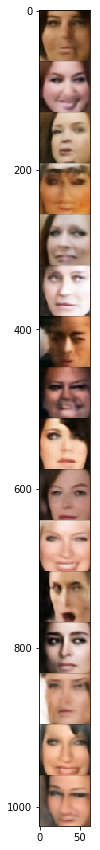

In [21]:
plt.figure(figsize=(15,15))
plt.imshow(defdecode.reshape(nPix*16,nPix,3))

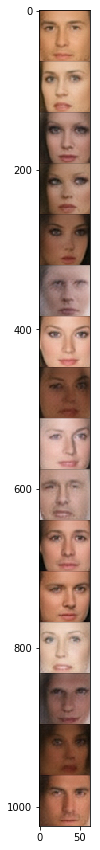

In [22]:
z_fixed = np.random.uniform(-1, 1, size=(batch_size, 64))
defdecode = trainer.generate(z_fixed, save=False)/255
plt.figure(figsize=(15,15))
randim = defdecode.reshape(nPix*16,nPix,3)
plt.imshow(randim)
randface = randim[:nPix,:nPix]

In [23]:
def getRandomFace():
    z_fixed = np.random.uniform(-1, 1, size=(batch_size, 64))
    defdecode = trainer.generate(z_fixed, save=False)/255
    plt.figure(figsize=(15,15))
    randim = defdecode.reshape(nPix*16,nPix,3)
    randface = randim[:nPix,:nPix]
    return randface

In [24]:
import face_recognition

# myfaces = glob.glob('/home/leonardo/Documents/GPUcomputing/Fototeca/Train_icon_text/angels/*.jpg')
# # myfaces = myurls
# print(len(myfaces))

# imurl = 'https://static.independent.co.uk/s3fs-public/thumbnails/image/2016/10/19/12/world-marches-5.jpg?w968h681'
imurl = 'https://cdn.images.express.co.uk/img/dynamic/galleries/x701/150763.jpg'
# imurl = 'http://www.sandro-botticelli.com/images/paintings/madonna-of-the-magnificat.jpg'
# imurl = 'https://images.eap.bl.uk/EAP054/EAP054_1_1/65.jp2/full/full/0/default.jpg'

# image = io.imread('http://www.sandro-botticelli.com/images/paintings/madonna-of-the-magnificat.jpg')
# image = io.imread('https://images.eap.bl.uk/EAP054/EAP054_1_1/65.jp2/full/full/0/default.jpg')
# image = io.imread('https://cdn.images.express.co.uk/img/dynamic/galleries/x701/150763.jpg')
image = io.imread(imurl)

if len(image.shape)==2:
    image = color.gray2rgb(image)
    image = color.gray2rgb(color.rgb2gray(image))
else:
    image = color.gray2rgb(color.rgb2gray(image))


In [25]:
def ganFaces(image):
    face_locations = face_recognition.face_locations(image, model="cnn")
#     plt.imshow(image)
    editim = image.copy()
#     print(len(face_locations))
    for fl in face_locations:
        top, right, bottom, left = fl
        faceim = image[top:bottom, left:right]
        myim = transform.resize(faceim,(nPix,nPix))
        myim = np.tile(myim,(16,1,1,1))
        myencoding = trainer.encode(myim*255)
        mydecoding = trainer.decode(myencoding)
        modelout = mydecoding[0,:,:,:]
        modelout -= np.min(modelout)
        modelout = modelout / np.max(modelout)
        modelout = transform.resize(modelout,faceim.shape)
        editim[top:bottom, left:right] = modelout*255
    return editim

In [26]:
def randFaces(image):
    face_locations = face_recognition.face_locations(image, model="cnn")
    editim = image.copy()
    print(len(face_locations))
    for fl in face_locations:
        top, right, bottom, left = fl
        faceim = image[top:bottom, left:right]
        modelout = getRandomFace()
        modelout -= np.min(modelout)
        modelout = modelout / np.max(modelout)
        modelout = transform.resize(modelout,faceim.shape)
        editim[top:bottom, left:right] = modelout*255
    return editim

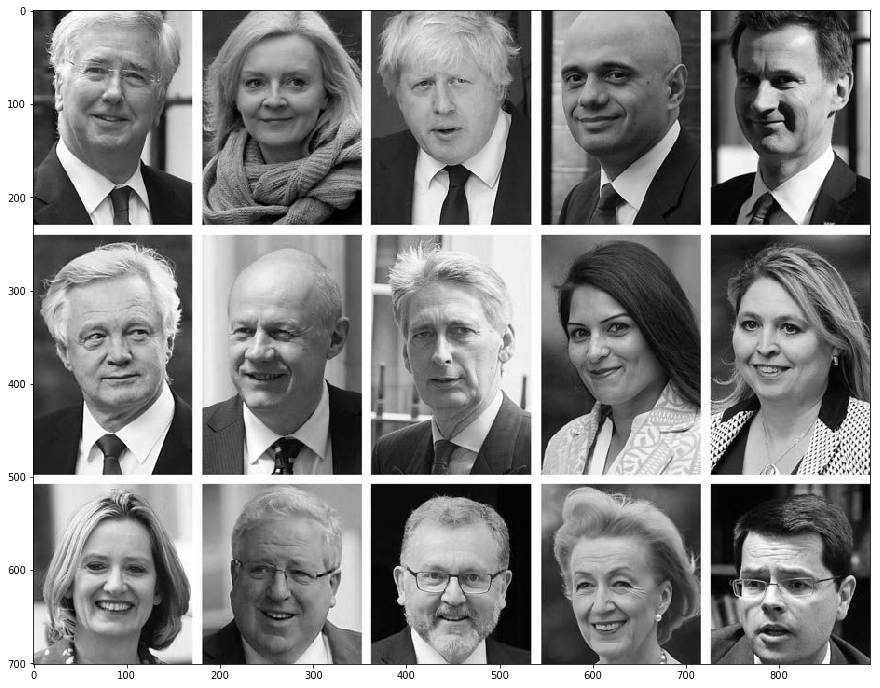

In [27]:
plt.figure(figsize=(15,15))
plt.imshow((image))

/home/leonardo/.conda/envs/tensorflow/lib/python3.5/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/leonardo/.conda/envs/tensorflow/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


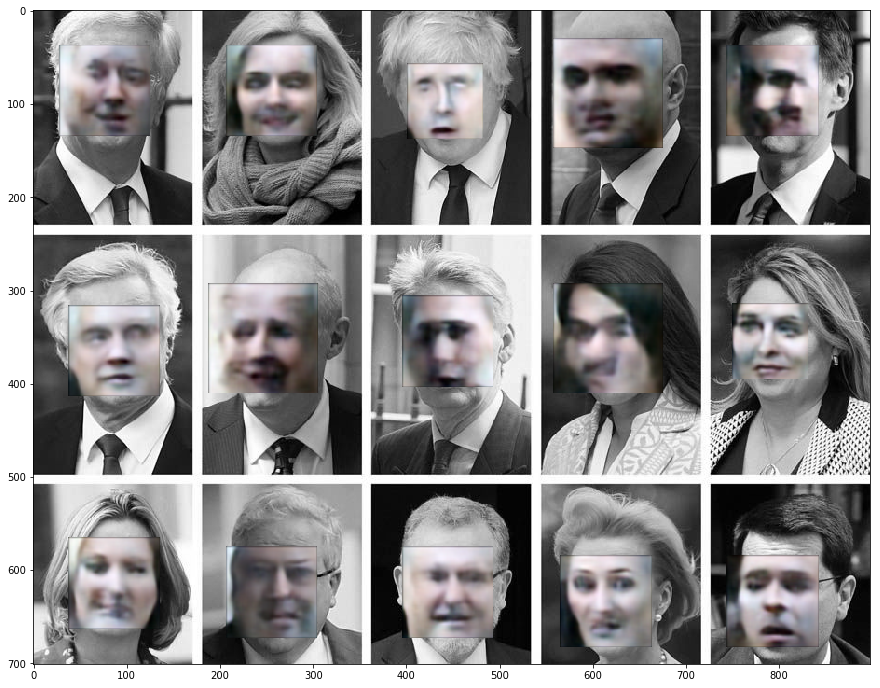

In [28]:
plt.figure(figsize=(15,15))
plt.imshow(ganFaces((image*255).astype(np.uint8)))

15


/home/leonardo/.conda/envs/tensorflow/lib/python3.5/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/leonardo/.conda/envs/tensorflow/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


<Figure size 720x720 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

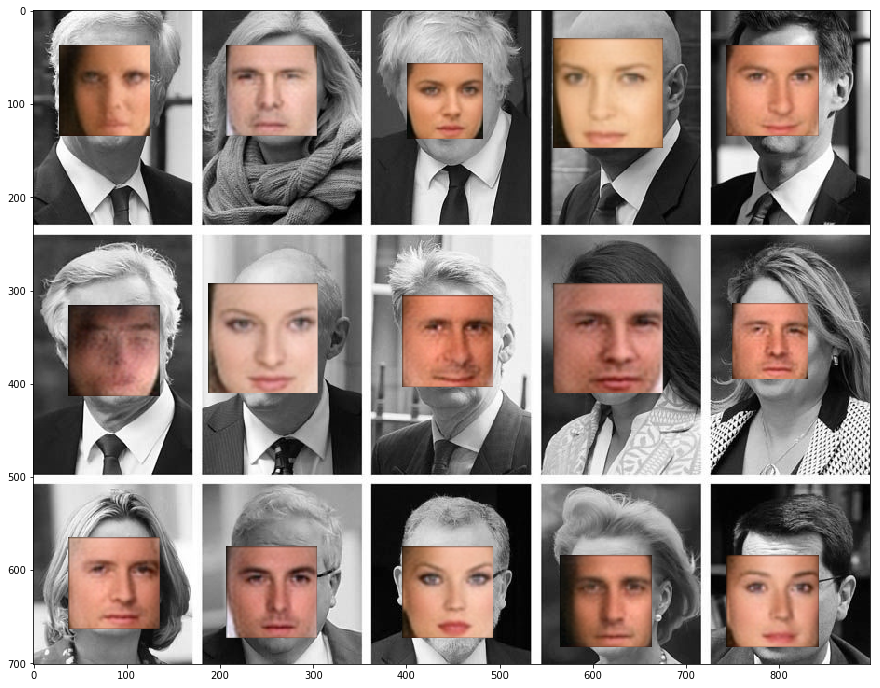

In [29]:
plt.figure(figsize=(10,10))
uimage = (image*255).astype(np.uint8)
plt.imshow(randFaces(uimage))

In [30]:
def getFaceEnc(image):
    face_locations = face_recognition.face_locations(image, model="cnn")
#     plt.imshow(image)
    for fl in face_locations[:1]:
        top, right, bottom, left = fl
        faceim = image[top:bottom, left:right]
        myim = transform.resize(faceim,(nPix,nPix))
        myim = np.tile(myim,(batch_size,1,1,1))
#         myencoding = trainer.ungenerate(myim*255)
        myencoding = trainer.encode(myim*255)
        return (myencoding, faceim)

In [31]:
FE, faceim = getFaceEnc(image)
# FE = FE[:batch_size,:]

RuntimeError: Unsupported image type, must be 8bit gray or RGB image.

In [ ]:
RE = trainer.encode( np.tile(randface*255, (16,1,1,1) ) )
# RE = np.tile(RE,(32,1))

In [ ]:
plt.imshow(faceim)

In [ ]:
plt.figure(figsize=(15,15))
for i in range(11):
    plt.subplot(1,11,i+1)
    j = 10 - i
    myencoding = (i/10.0)*FE + (j/10.0)*RE
#     myencoding = FE
#     modelout = trainer.generate(myencoding, save=False)
    modelout = trainer.decode(myencoding)
    modelout -= np.min(modelout)
    modelout = modelout / np.max(modelout)
    plt.imshow(modelout[0,:,:,:])

In [ ]:
myim = np.tile(transform.resize(faceim,(64,64)),(16,1,1,1))
myencoding = trainer.encode(myim*255)
print(myencoding.shape)
mydecoding = trainer.decode(myencoding)
plt.imshow(mydecoding[0,:,:,:]/255)

In [ ]:
# plt.figure(figsize=(15,15))
# face_locations = face_recognition.face_locations(image, model="cnn")
# editim = image.copy()
# print(len(face_locations))
# for fl in face_locations:
#     top, right, bottom, left = fl
#     faceim = image[top:bottom, left:right]
#     myim = transform.resize(faceim,(nPix,nPix))
#     myim = np.tile(myim,(16,1,1,1))
#     myencoding = trainer.encode(myim*255)
#     myencoding = (coef/10.0)*FE + ((1.0-coef)/10.0)*RE
#     mydecoding = trainer.decode(myencoding)
#     modelout = mydecoding[0,:,:,:]
#     modelout -= np.min(modelout)
#     modelout = modelout / np.max(modelout)
#     modelout = transform.resize(modelout,faceim.shape)
#     editim[top:bottom, left:right] = modelout*255
# plt.imshow(editim)